In [35]:
import pandas as pd
import numpy as np
# from IPython.display import display

In [36]:
df = pd.read_csv('../data/raw/clinical_data.zip')

In [37]:
pd.set_option('display.max_columns', None)


In [38]:
df.columns

Index(['Age recode with <1 year olds and 90+',
       'Race and origin (recommended by SEER)',
       'Race recode (White, Black, Other)', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
       'Diagnostic Confirmation',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'Type of Reporting Source', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)'

In [39]:
df["Age recode with <1 year olds and 90+"].value_counts()

Age recode with <1 year olds and 90+
70-74 years    97036
65-69 years    90536
75-79 years    85304
60-64 years    69285
80-84 years    61531
55-59 years    45460
85-89 years    34987
50-54 years    21972
90+ years      16093
45-49 years     8692
40-44 years     3471
35-39 years     1532
30-34 years      754
25-29 years      375
20-24 years      196
15-19 years       85
01-04 years       37
10-14 years       35
00 years          20
05-09 years       17
Name: count, dtype: int64

In [40]:
def transform_age_recode(df, column_name):
    
    # Define the mapping based on your specific distribution
    age_mapping = {
        '00 years': 0.5,
        '01-04 years': 2.5,
        '05-09 years': 7.0,
        '10-14 years': 12.0,
        '15-19 years': 17.0,
        '20-24 years': 22.0,
        '25-29 years': 27.0,
        '30-34 years': 32.0,
        '35-39 years': 37.0,
        '40-44 years': 42.0,
        '45-49 years': 47.0,
        '50-54 years': 52.0,
        '55-59 years': 57.0,
        '60-64 years': 62.0,
        '65-69 years': 67.0,
        '70-74 years': 72.0,
        '75-79 years': 77.0,
        '80-84 years': 82.0,
        '85-89 years': 87.0,
        '90+ years': 92.5  # Standard clinical estimate for 90+
    }
    
    # Clean the string to ensure matching (strip extra spaces)
    df[column_name] = df[column_name].str.strip()
    
    # Map values and create a new numeric column
    df['age_numeric'] = df[column_name].map(age_mapping)
    
    return df


df = transform_age_recode(df, 'Age recode with <1 year olds and 90+')

Convertir a Valor Numérico Continúo (Midpoint Mapping)
En modelos de supervivencia, la edad es un factor de riesgo lineal o log-lineal. La mejor práctica profesional para "desbloquear" el poder predictivo de datos agrupados es asignar el punto medio de cada rango.

In [41]:
#Borrar la antigua columna de registros de edad
df = df.drop("Age recode with <1 year olds and 90+", axis=1)

In [42]:
df.columns

Index(['Race and origin (recommended by SEER)',
       'Race recode (White, Black, Other)', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
       'Diagnostic Confirmation',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'Type of Reporting Source', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)',
       'Derived EOD 2018 Stage Group Recode (

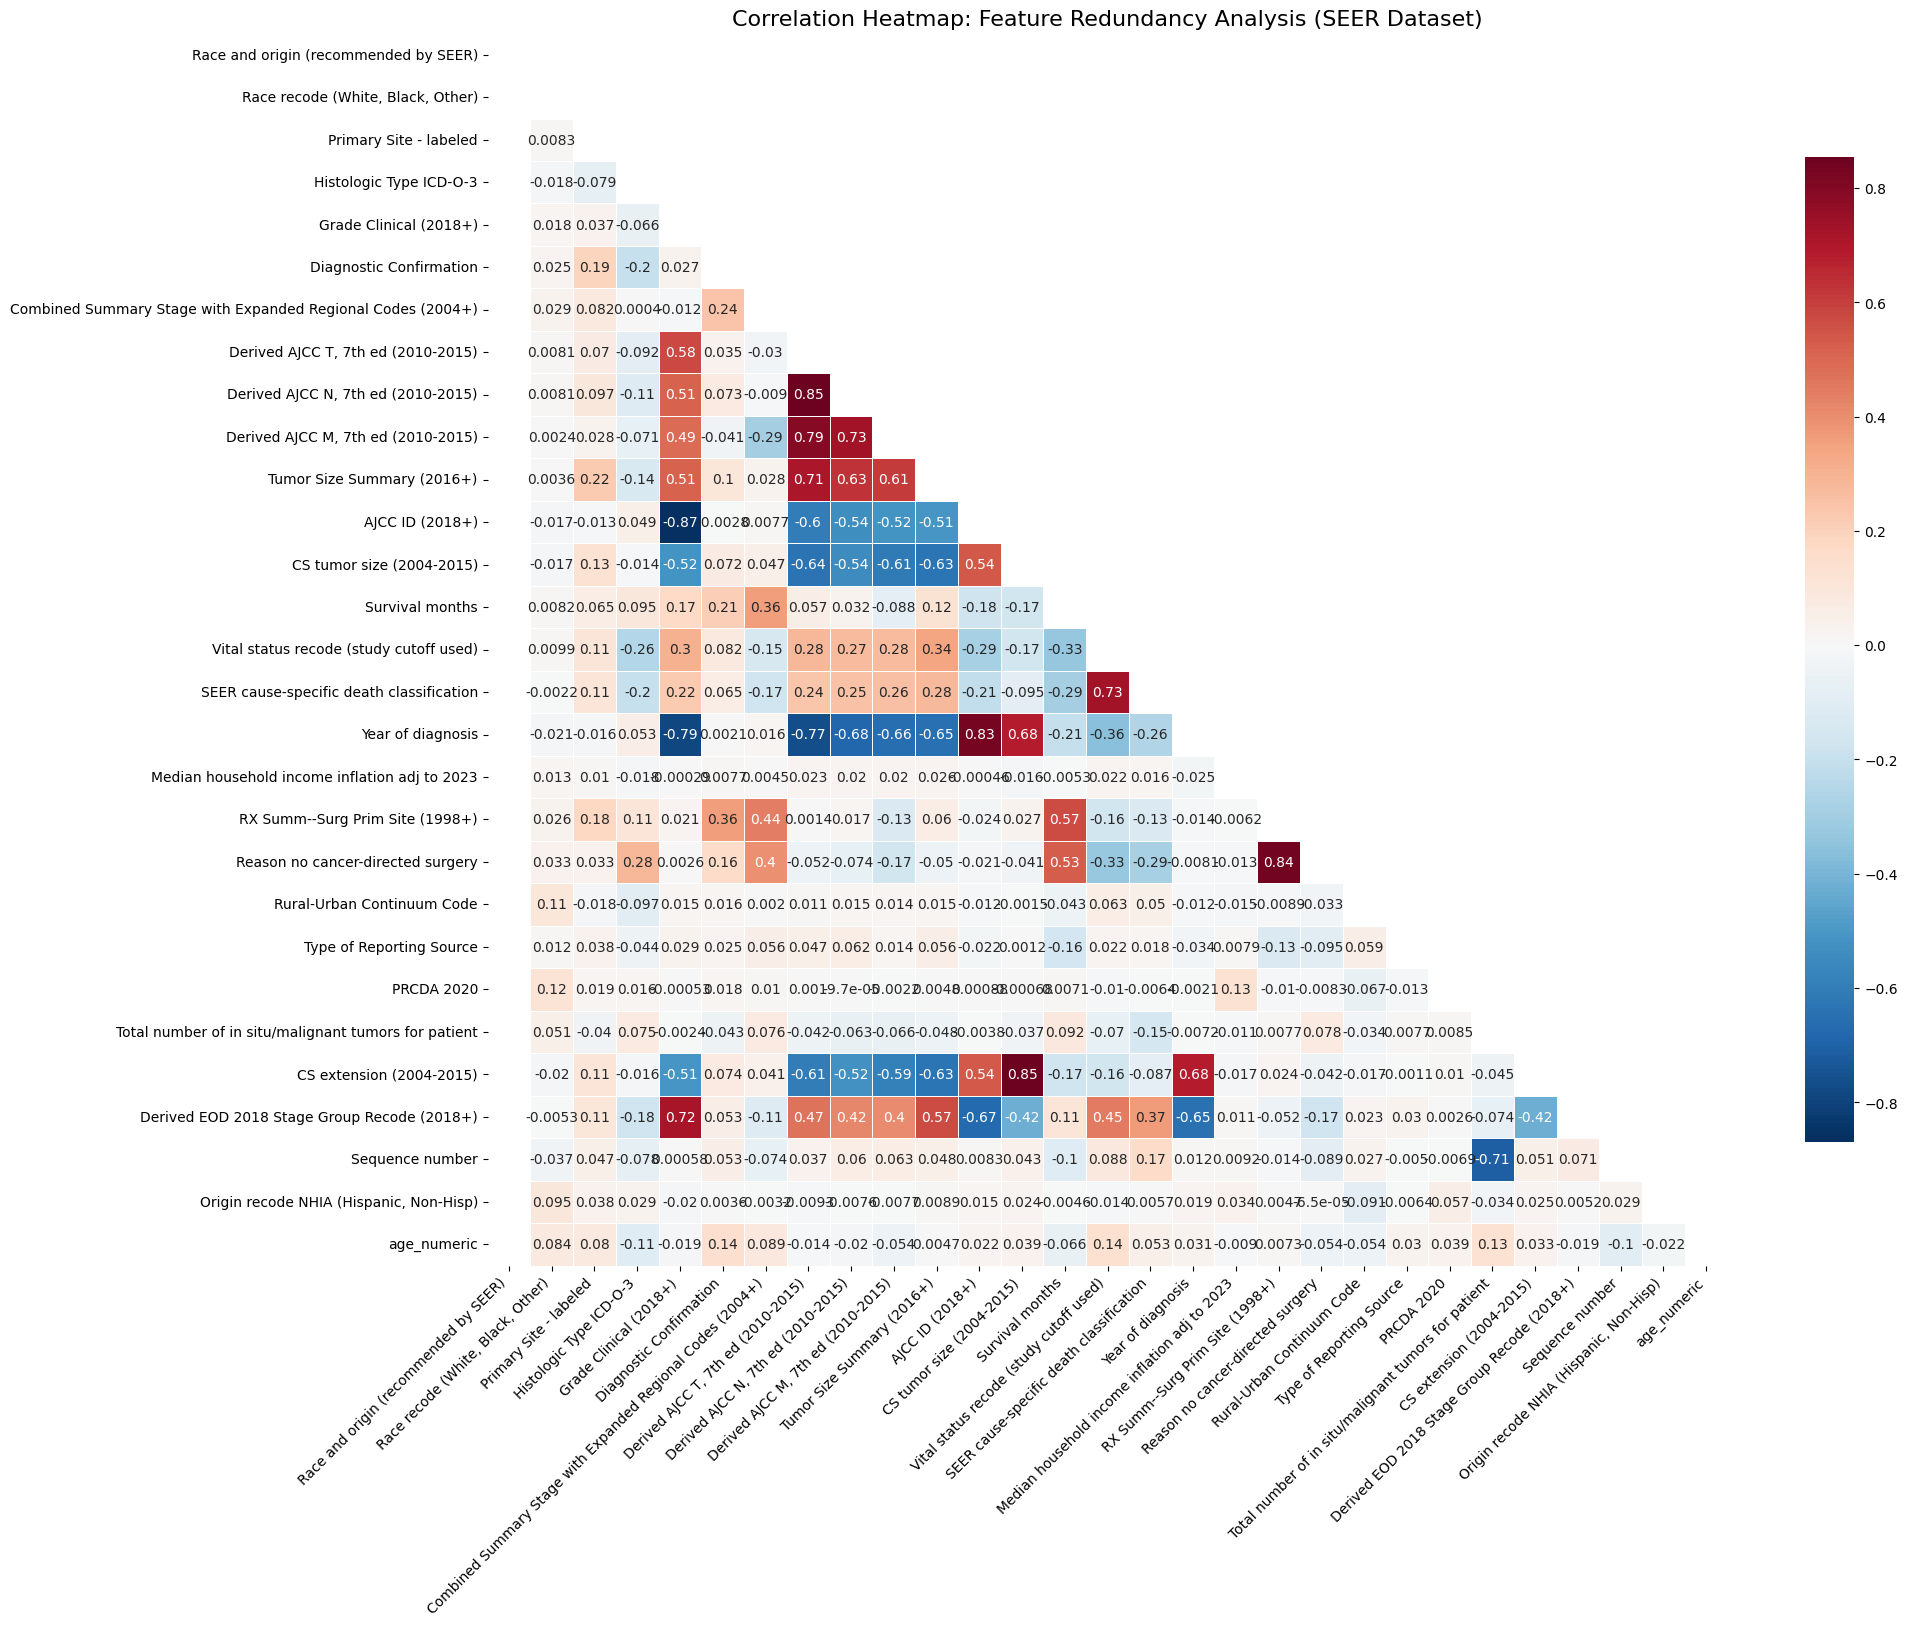

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_seer_heatmap(df):
    """
    Encodes categorical features and plots a correlation heatmap 
    to identify redundant columns in SEER data.
    """
    # 1. Select the columns provided in your index
    columns_to_analyze = [
        'Race and origin (recommended by SEER)', 'Race recode (White, Black, Other)', 
        'Primary Site - labeled', 'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
        'Diagnostic Confirmation', 'Combined Summary Stage with Expanded Regional Codes (2004+)',
        'Derived AJCC T, 7th ed (2010-2015)', 'Derived AJCC N, 7th ed (2010-2015)',
        'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
        'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
        'Vital status recode (study cutoff used)', 'SEER cause-specific death classification', 
        'Year of diagnosis', 'Median household income inflation adj to 2023',
        'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
        'Rural-Urban Continuum Code', 'Type of Reporting Source', 'PRCDA 2020',
        'Total number of in situ/malignant tumors for patient', 'CS extension (2004-2015)',
        'Derived EOD 2018 Stage Group Recode (2018+)', 'Sequence number',
        'Origin recode NHIA (Hispanic, Non-Hisp)', 'age_numeric'
    ]
    
    # Filter only available columns to avoid errors
    analysis_df = df[columns_to_analyze].copy()

    # 2. Encode categorical columns to numeric codes for correlation analysis
    for col in analysis_df.select_dtypes(include=['object', 'category']).columns:
        analysis_df[col] = analysis_df[col].astype('category').cat.codes

    # 3. Calculate Correlation Matrix
    corr_matrix = analysis_df.corr()

    # 4. Visualization
    plt.figure(figsize=(20, 16))
    
    # Mask to hide the upper triangle (it's redundant)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(
        corr_matrix, 
        mask=mask, 
        annot=True,
        cmap='RdBu_r', 
        center=0,
        linewidths=.5,
        cbar_kws={"shrink": .8}
    )
    
    plt.title('Correlation Heatmap: Feature Redundancy Analysis (SEER Dataset)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Execution:
plot_seer_heatmap(df)

In [44]:
df["Combined Summary Stage with Expanded Regional Codes (2004+)"].value_counts()

Combined Summary Stage with Expanded Regional Codes (2004+)
Distant site(s)/node(s) involved                                264805
Localized only                                                  127866
Regional lymph nodes involved only                               44909
Regional by direct extension only                                34960
Unknown/unstaged/unspecified/DCO                                 34741
Regional by both direct extension and lymph node involvement     30134
In situ                                                              3
Name: count, dtype: int64

In [45]:
df.iloc[0]["Combined Summary Stage with Expanded Regional Codes (2004+)"]

'Regional by both direct extension and lymph node involvement'

In [46]:
df.iloc[0]["Combined Summary Stage with Expanded Regional Codes (2004+)"]

'Regional by both direct extension and lymph node involvement'

In [47]:
df["Derived AJCC T, 7th ed (2010-2015)"].value_counts()

Derived AJCC T, 7th ed (2010-2015)
Blank(s)    341816
T4           38228
T3           35059
T2a          32153
TX           30491
T1a          24156
T1b          16944
T2b          11829
T2NOS         4940
T0            1175
T1NOS          196
Name: count, dtype: int64

In [48]:
df["Derived AJCC N, 7th ed (2010-2015)"].value_counts()

Derived AJCC N, 7th ed (2010-2015)
Blank(s)    341816
N0           75856
N2           61327
N3           22936
NX           20382
N1           14670
Name: count, dtype: int64

In [49]:
df["Derived AJCC M, 7th ed (2010-2015)"].value_counts()

Derived AJCC M, 7th ed (2010-2015)
Blank(s)    341816
M0          104627
M1b          64647
M1a          24313
M1NOS         1584
Name: count, dtype: int64

In [50]:
columns_to_drop = ["Race and origin (recommended by SEER)",
                   "Type of Reporting Source", 
                   "Diagnostic Confirmation"]
df = df.drop(columns=columns_to_drop)

df.columns

Index(['Race recode (White, Black, Other)', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)',
       'Derived EOD 2018 Stage Group Recode (2018+)', 'Sequence number',
       'Origin recode NHIA (Hispanic, Non-Hisp)', 'age_numeric'],
      dtype='obj

In [51]:
df["Total number of in situ/malignant tumors for patient"].value_counts()

Total number of in situ/malignant tumors for patient
1     371807
2     120174
3      33831
4       8687
5       2095
6        560
7        173
8         39
9         21
10        10
11         6
21         2
13         2
14         2
32         2
20         2
30         2
34         1
18         1
23         1
Name: count, dtype: int64

In [52]:
df["Sequence number"].value_counts()

Sequence number
One primary only                368416
2nd of 2 or more primaries      107682
1st of 2 or more primaries       28762
3rd of 3 or more primaries       25322
4th of 4 or more primaries        5619
5th of 5 or more primaries        1193
6th of 6 or more primaries         293
7th of 7 or more primaries          85
8th of 8 or more primaries          17
9th of 9 or more primaries           8
10th of 10 or more primaries         5
21st of 21 or more primaries         2
13th of 13 or more primaries         2
14th of 14 or more primaries         2
11th of 11 or more primaries         2
32nd of 32 or more primaries         2
30th of 30 or more primaries         2
20th of 20 or more primaries         2
17th of 17 or more primaries         1
34th of 34 or more primaries         1
Name: count, dtype: int64

In [53]:
df["Vital status recode (study cutoff used)"].value_counts()

Vital status recode (study cutoff used)
Dead     389332
Alive    148086
Name: count, dtype: int64

In [54]:
df["Rural-Urban Continuum Code"].value_counts()


Rural-Urban Continuum Code
Counties in metropolitan areas ge 1 million pop                 291753
Counties in metropolitan areas of 250,000 to 1 million pop      113711
Nonmetropolitan counties adjacent to a metropolitan area         49586
Counties in metropolitan areas of lt 250 thousand pop            46491
Nonmetropolitan counties not adjacent to a metropolitan area     35039
Unknown/missing/no match (Alaska or Hawaii - Entire State)         821
Unknown/missing/no match/Not 1990-2023                              17
Name: count, dtype: int64

In [55]:
df = df[~df["Rural-Urban Continuum Code"].isin(["Unknown/missing/no match (Alaska or Hawaii - Entire State)", "Unknown/missing/no match/Not 1990-2023"])]

In [56]:
df["Rural-Urban Continuum Code"].value_counts()


Rural-Urban Continuum Code
Counties in metropolitan areas ge 1 million pop                 291753
Counties in metropolitan areas of 250,000 to 1 million pop      113711
Nonmetropolitan counties adjacent to a metropolitan area         49586
Counties in metropolitan areas of lt 250 thousand pop            46491
Nonmetropolitan counties not adjacent to a metropolitan area     35039
Name: count, dtype: int64

# Analisis de variables

In [57]:
df.head()

,"Race recode (White, Black, Other)",Primary Site - labeled,Histologic Type ICD-O-3,Grade Clinical (2018+),Combined Summary Stage with Expanded Regional Codes (2004+),"Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Tumor Size Summary (2016+),AJCC ID (2018+),CS tumor size (2004-2015),Survival months,Vital status recode (study cutoff used),SEER cause-specific death classification,Year of diagnosis,Median household income inflation adj to 2023,RX Summ--Surg Prim Site (1998+),Reason no cancer-directed surgery,Rural-Urban Continuum Code,PRCDA 2020,Total number of in situ/malignant tumors for patient,CS extension (2004-2015),Derived EOD 2018 Stage Group Recode (2018+),Sequence number,"Origin recode NHIA (Hispanic, Non-Hisp)",age_numeric
0,White,"C34.1-Upper lobe, lung",8140,2,Regional by both direct extension and lymph no...,Blank(s),Blank(s),Blank(s),070,Lung,Blank(s),0059,Alive,Alive or dead of other cause,2018,"$120,000+",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,Blank(s),3A,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0
1,White,C34.0-Main bronchus,8140,Blank(s),Distant site(s)/node(s) involved,Blank(s),Blank(s),Blank(s),109,Blank(s),Blank(s),0027,Dead,Dead (attributable to this cancer dx),2016,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,Blank(s),Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0
2,Black,"C34.9-Lung, NOS",8041,Blank(s),Unknown/unstaged/unspecified/DCO,TX,NX,M0,Blank(s),Blank(s),999,0000,Dead,Dead (attributable to this cancer dx),2014,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,999,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0
3,White,"C34.1-Upper lobe, lung",8550,Blank(s),Regional by direct extension only,T3,N0,M0,Blank(s),Blank(s),028,0052,Dead,Dead (attributable to this cancer dx),2015,"$100,000 - $109,999",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,100,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,82.0
4,White,"C34.1-Upper lobe, lung",8140,3,Localized only,Blank(s),Blank(s),Blank(s),033,Lung,Blank(s),0012,Dead,Alive or dead of other cause,2020,"$120,000+",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Not PRCDA,3,Blank(s),1B,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0


In [58]:
# Creamos una tabla resumen de las 29 columnas
resumen_columnas = pd.DataFrame({
    'Tipo': df.dtypes,
    'No Nulos': df.count(),
    'Nulos': df.isnull().sum()
})

# Forzamos a Pandas a mostrar todas las filas de este resumen
pd.set_option('display.max_rows', None)

display(resumen_columnas)

,Tipo,No Nulos,Nulos
"Race recode (White, Black, Other)",object,536580,0
Primary Site - labeled,object,536580,0
Histologic Type ICD-O-3,int64,536580,0
Grade Clinical (2018+),object,536580,0
Combined Summary Stage with Expanded Regional Codes (2004+),object,536580,0
"Derived AJCC T, 7th ed (2010-2015)",object,536149,431
"Derived AJCC N, 7th ed (2010-2015)",object,536149,431
"Derived AJCC M, 7th ed (2010-2015)",object,536149,431
Tumor Size Summary (2016+),object,536580,0
AJCC ID (2018+),object,536580,0


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Histologic Type ICD-O-3,536580.0,8122.804152,126.555805,8000.0,8041.0,8072.0,8140.0,9581.0
Year of diagnosis,536580.0,2016.976768,3.142214,2012.0,2014.0,2017.0,2020.0,2022.0
RX Summ--Surg Prim Site (1998+),536580.0,9.525204,20.703185,0.0,0.0,0.0,0.0,99.0
Total number of in situ/malignant tumors for patient,536580.0,1.422543,0.751978,1.0,1.0,1.0,2.0,34.0
age_numeric,536580.0,70.487729,10.873483,0.5,62.0,72.0,77.0,92.5


In [60]:
#eliminacion de datos duplicados
# df.drop_duplicates()

In [61]:
df.nunique()

Race recode (White, Black, Other)                                4
Primary Site - labeled                                           6
Histologic Type ICD-O-3                                        192
Grade Clinical (2018+)                                          11
Combined Summary Stage with Expanded Regional Codes (2004+)      7
Derived AJCC T, 7th ed (2010-2015)                              11
Derived AJCC N, 7th ed (2010-2015)                               6
Derived AJCC M, 7th ed (2010-2015)                               5
Tumor Size Summary (2016+)                                     301
AJCC ID (2018+)                                                  5
CS tumor size (2004-2015)                                      291
Survival months                                                133
Vital status recode (study cutoff used)                          2
SEER cause-specific death classification                         3
Year of diagnosis                                             

In [62]:
df["RX Summ--Surg Prim Site (1998+)"].value_counts()

RX Summ--Surg Prim Site (1998+)
0     407898
33     66911
21     19731
99     16628
30      9047
22      6195
56      2217
45      2001
12       840
23       773
46       755
90       663
55       659
20       537
24       392
15       333
13       262
19       198
80       136
25       128
47        80
48        69
70        58
66        39
65        30
Name: count, dtype: int64

In [63]:
df["Reason no cancer-directed surgery"].value_counts()

Reason no cancer-directed surgery
Not recommended                                                                 368591
Surgery performed                                                               112054
Not recommended, contraindicated due to other cond; autopsy only (1973-2002)     24406
Unknown; death certificate; or autopsy only (2003+)                              17000
Recommended but not performed, patient refused                                    8139
Recommended but not performed, unknown reason                                     4210
Recommended, unknown if performed                                                 1138
Not performed, patient died prior to recommended surgery                          1042
Name: count, dtype: int64

In [64]:
# 1. Identificar columnas no numéricas
columnas_no_num = df.select_dtypes(exclude=['number']).columns

# 2. Iterar y mostrar usando f-strings
for col in columnas_no_num:
    print(col)
    print(df[col].unique())
   

Race recode (White, Black, Other)
['White' 'Black'
 'Other (American Indian/AK Native, Asian/Pacific Islander)' 'Unknown']
Primary Site - labeled
['C34.1-Upper lobe, lung' 'C34.0-Main bronchus' 'C34.9-Lung, NOS'
 'C34.3-Lower lobe, lung' 'C34.2-Middle lobe, lung'
 'C34.8-Overlapping lesion of lung']
Grade Clinical (2018+)
['2' 'Blank(s)' '3' '9' '1' '4' 'D' 'C' 'B' 'H' 'A']
Combined Summary Stage with Expanded Regional Codes (2004+)
['Regional by both direct extension and lymph node involvement'
 'Distant site(s)/node(s) involved' 'Unknown/unstaged/unspecified/DCO'
 'Regional by direct extension only' 'Localized only'
 'Regional lymph nodes involved only' 'In situ']
Derived AJCC T, 7th ed (2010-2015)
['Blank(s)' 'TX' 'T3' 'T1b' 'T4' 'T1a' 'T2a' 'T2b' nan 'T2NOS' 'T1NOS'
 'T0']
Derived AJCC N, 7th ed (2010-2015)
['Blank(s)' 'NX' 'N0' 'N2' 'N3' 'N1' nan]
Derived AJCC M, 7th ed (2010-2015)
['Blank(s)' 'M0' 'M1a' 'M1b' nan 'M1NOS']
Tumor Size Summary (2016+)
['070' '109' 'Blank(s)' '033' '